In [16]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
from scipy.integrate import solve_ivp
#%config InlineBackend.figure_format='retina'


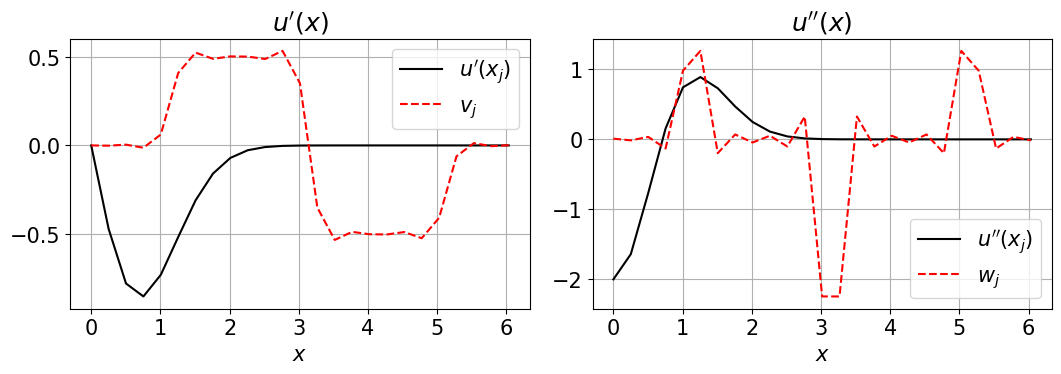

In [11]:
N = 25
xlim = [0, 2 * np.pi]
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]

#definition of function 1
uj = [max(0, 1 - (abs(x - np.pi)/ 2)) for x in xj]
Uj = fft.fft(uj)
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# 1st-order derivatives
Vj = 1j * kj * Uj
vj = fft.ifft(Vj)

# 2nd-order derivatives
Wj = -1 * kj**2 * Uj
wj = fft.ifft(Wj)

# exact solution and vj.real solution plot
plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
plt.plot(xj, -2*xj * np.exp(-xj**2), "-k",
         xj, vj.real, "--r")
plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$u'(x)$")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(xj, -2*np.exp(-xj**2) + (-2*xj)**2 * np.exp(-xj**2), "-k",
         xj, wj.real, "--r")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$u''(x)$")
plt.grid()

plt.tight_layout()
plt.savefig("Differntiation_1.pdf")

2번은 문제없이 해결.

----------------------------------------------------------------------
1st-order derivatives accuracy
----------------------------------------------------------------------
if x = 0.00000000, u - wj: 9.999778782798785e-13
if x = 0.25132741, u - wj: -1.0031975250512914e-12
if x = 0.50265482, u - wj: 9.9298347322474e-13
if x = 0.75398224, u - wj: -9.636735853746359e-13
if x = 1.00530965, u - wj: 9.128253708468037e-13
if x = 1.25663706, u - wj: -8.423262087831063e-13
if x = 1.50796447, u - wj: 7.576994587310537e-13
if x = 1.75929189, u - wj: -6.540323838066797e-13
if x = 2.01061930, u - wj: 5.362377208939506e-13
if x = 2.26194671, u - wj: -4.1611158962950867e-13
if x = 2.51327412, u - wj: 2.877698079828406e-13
if x = 2.76460154, u - wj: -1.5476508963274682e-13
if x = 3.01592895, u - wj: 2.731148640577885e-14
if x = 3.26725636, u - wj: 9.725553695716371e-14
if x = 3.51858377, u - wj: -2.1471713296250527e-13
if x = 3.76991118, u - wj: 3.26183524634871e-13
if x = 4.02123860, u - wj: -4.33042

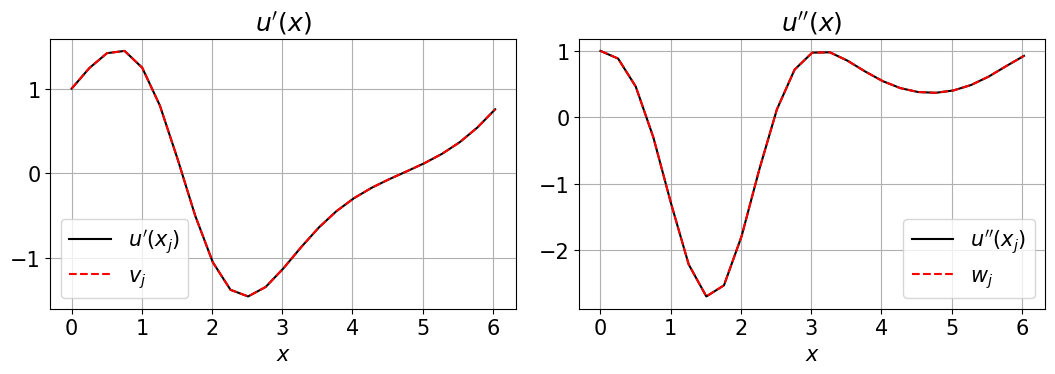

In [13]:
N = 25
xlim = [0, 2 * np.pi]
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]

#definition of function 2
uj = [np.exp(np.sin(x)) for x in xj]
Uj = fft.fft(uj)
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# 1st-order derivatives
Vj = 1j * kj * Uj
vj = fft.ifft(Vj)

# 2nd-order derivatives
Wj = -1 * kj**2 * Uj
wj = fft.ifft(Wj)

# exact solution and vj.real solution plot
plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
plt.plot(xj, np.cos(xj) * np.exp(np.sin(xj)), "-k",
         xj, vj.real, "--r")

plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$u'(x)$")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(xj, ((np.cos(xj))**2 - np.sin(xj)) * np.exp(np.sin(xj)), "-k",
         xj, wj.real, "--r")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$u''(x)$")
plt.grid()
plt.tight_layout()
plt.savefig("Differntiation_2.pdf")


# Compare the exact solutions and vj, uj
print("-"*70)
print("1st-order derivatives accuracy")
print("-"*70)
error1 = np.cos(xj) * np.exp(np.sin(xj)) - vj.real 
for i, err in enumerate(error1):
    print(f"if x = {xj[i]:.8f}, u - wj: {err}")
print("-"*70)
print("2st-order derivatives accuracy")
print("-"*70)
error2 = ((np.cos(xj))**2 - np.sin(xj)) * np.exp(np.sin(xj)) - wj.real 
for i, err in enumerate(error2):
    print(f"if x = {xj[i]:.8f}, u - wj: {err}")



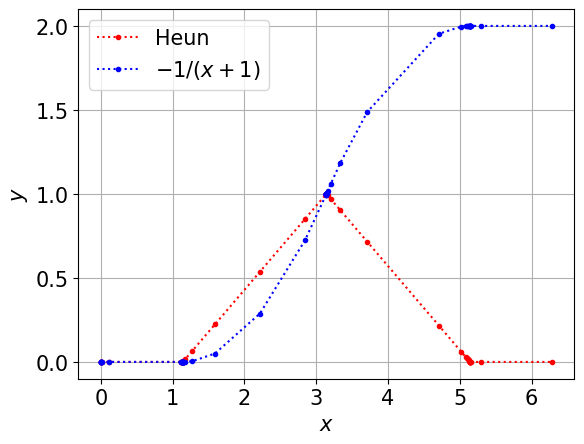

'\n# Exact value - finite diff 2nd\nerror2 = wj.real - xs \nfor i, err in enumerate(error2):\n    print(f"if x = {xj[i]:.8f}, u - wj: {err}")\n'

In [56]:
def f(x, Y): # F = [v, w], Y = [x, v]
    return max(0, 1 - (abs(x - np.pi)/ 2))


a = solve_ivp(f, [0, 2 * np.pi], [0], method='DOP853', dense_output = True, rtol = 1e-13, atol = 1e-13)
error = [max(0, 1 - (abs(x - np.pi)/ 2)) - a.y for x in a.t]
#print(error)
#print([max(0, 1 - (abs(x - np.pi)/ 2)) for x in a.t])
#print(len(a.y[0]), len(a.t))


plt.figure()
plt.plot(a.t, [max(0, 1 - (abs(t - np.pi)/ 2)) for t in a.t]
, ".:r", a.t, a.y[0], ".:b")
plt.legend(["Heun", "$-1/(x + 1)$"])
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

"""
# Exact value - finite diff 2nd
error2 = wj.real - xs 
for i, err in enumerate(error2):
    print(f"if x = {xj[i]:.8f}, u - wj: {err}")
"""

In [21]:
x = 0
max(0, 1 - (abs(x - np.pi)/ 2))

0

# 기존의 함수도 그대로 나오는지 확인!

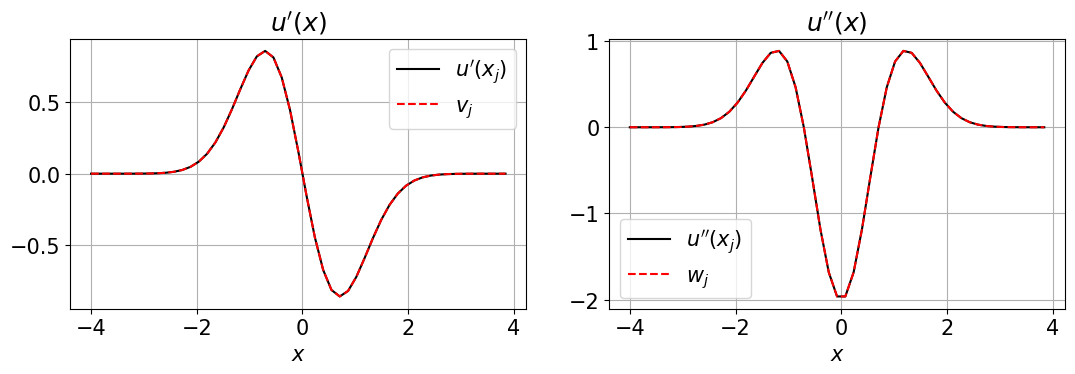

In [18]:
N = 51
xlim = [-4, 4]
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
uj = [np.exp(-x**2) for x in xj]

Uj = fft.fft(uj)
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# 1st-order derivatives
Vj = 1j * kj * Uj
vj = fft.ifft(Vj)

# 2nd-order derivatives
Wj = -1 * kj**2 * Uj
wj = fft.ifft(Wj)

# plot
plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
plt.plot(xj, -2*xj * np.exp(-xj**2), "-k",
         xj, vj.real, "--r")
plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$u'(x)$")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(xj, -2*np.exp(-xj**2) + (-2*xj)**2 * np.exp(-xj**2), "-k",
         xj, wj.real, "--r")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$u''(x)$")
plt.grid()

plt.tight_layout()
plt.show()